In [10]:

import numpy as np 
import pandas as pd


In [11]:
df = pd.read_csv('C:/Users/ADMIN/internship project/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-05 00:00:00+00:00,94.99,95.40,94.46,95.39,27705210,22.181442,22.277183,22.057680,22.274848,110820840,0.0,1.0
1,AAPL,2016-07-06 00:00:00+00:00,95.53,95.66,94.37,94.60,30949090,22.307540,22.337896,22.036664,22.090372,123796360,0.0,1.0
2,AAPL,2016-07-07 00:00:00+00:00,95.94,96.50,95.62,95.70,25139558,22.403280,22.534048,22.328556,22.347237,100558232,0.0,1.0
3,AAPL,2016-07-08 00:00:00+00:00,96.68,96.89,96.05,96.49,28912103,22.576080,22.625118,22.428967,22.531713,115648412,0.0,1.0
4,AAPL,2016-07-11 00:00:00+00:00,96.98,97.65,96.73,96.75,23794945,22.646134,22.802588,22.587756,22.592426,95179780,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-06-28 00:00:00+00:00,134.78,135.245,133.350,133.41,62111303,134.78,135.245,133.350,133.41,62111303,0.0,1.0
1255,AAPL,2021-06-29 00:00:00+00:00,136.33,136.490,134.350,134.80,64556081,136.33,136.490,134.350,134.80,64556081,0.0,1.0
1256,AAPL,2021-06-30 00:00:00+00:00,136.96,137.410,135.870,136.17,63261393,136.96,137.410,135.870,136.17,63261393,0.0,1.0
1257,AAPL,2021-07-01 00:00:00+00:00,137.27,137.330,135.760,136.60,52485781,137.27,137.330,135.760,136.60,52485781,0.0,1.0
1258,AAPL,2021-07-02 00:00:00+00:00,139.96,140.000,137.745,137.90,78945572,139.96,140.000,137.745,137.90,78945572,0.0,1.0


In [13]:
df.shape

(1259, 14)

In [14]:
df1 = df.reset_index()['close']
df1

0        94.99
1        95.53
2        95.94
3        96.68
4        96.98
         ...  
1254    134.78
1255    136.33
1256    136.96
1257    137.27
1258    139.96
Name: close, Length: 1259, dtype: float64

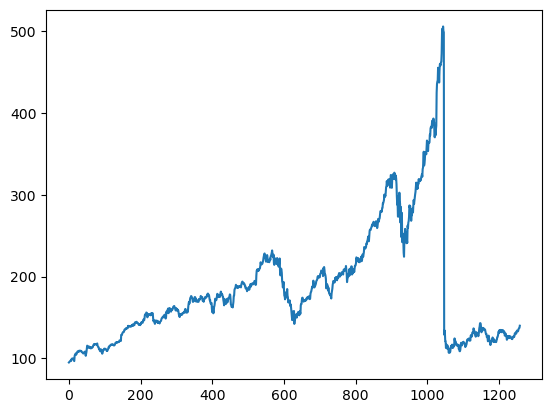

In [30]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np

In [16]:
df1

0        94.99
1        95.53
2        95.94
3        96.68
4        96.98
         ...  
1254    134.78
1255    136.33
1256    136.96
1257    137.27
1258    139.96
Name: close, Length: 1259, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.        ]
 [0.00131355]
 [0.00231087]
 ...
 [0.10209195]
 [0.10284602]
 [0.10938944]]


In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(818, 441)

In [21]:
train_data

array([[0.        ],
       [0.00131355],
       [0.00231087],
       [0.00411092],
       [0.00484067],
       [0.00591097],
       [0.0045731 ],
       [0.00924349],
       [0.00921917],
       [0.01177329],
       [0.01187059],
       [0.01208952],
       [0.01080029],
       [0.00892727],
       [0.00571637],
       [0.0040866 ],
       [0.01936269],
       [0.02274386],
       [0.02242763],
       [0.02690343],
       [0.02308441],
       [0.02627098],
       [0.02646558],
       [0.0303819 ],
       [0.03254683],
       [0.03361712],
       [0.0316468 ],
       [0.03147653],
       [0.03208465],
       [0.0352469 ],
       [0.03500365],
       [0.03461445],
       [0.0342739 ],
       [0.034955  ],
       [0.03288738],
       [0.03371442],
       [0.03171978],
       [0.03060083],
       [0.02906835],
       [0.02877645],
       [0.0267818 ],
       [0.02702505],
       [0.02855753],
       [0.03099003],
       [0.03091705],
       [0.0325225 ],
       [0.02561421],
       [0.019

In [22]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 346ms/step - loss: 0.0095 - val_loss: 0.0435
Epoch 2/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0024 - val_loss: 0.0272
Epoch 3/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0013 - val_loss: 0.0249
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 7.2575e-04 - val_loss: 0.0214
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 5.3741e-04 - val_loss: 0.0212
Epoch 6/100
12/12 [==============================] - 2s 188ms/step - loss: 4.7908e-04 - val_loss: 0.0214
Epoch 7/100
12/12 [==============================] - 2s 197ms/step - loss: 4.3014e-04 - val_loss: 0.0204
Epoch 8/100
12/12 [==============================] - 2s 205ms/step - loss: 4.0638e-04 - val_loss: 0.0197
Epoch 9/100
12/12 [==============================] - 2s 201ms/step - loss: 4.0807e-04 - val_loss: 0.0196
Epoch 10/100
12/12 [==============================] - 3s 211ms/ste

In [35]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 42ms/step


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[287.47168 ],
       [276.1941  ],
       [265.43286 ],
       [260.54388 ],
       [260.03107 ],
       [264.50113 ],
       [270.63846 ],
       [276.02057 ],
       [276.30606 ],
       [275.07513 ],
       [272.23706 ],
       [264.80322 ],
       [258.85562 ],
       [250.85243 ],
       [243.3312  ],
       [236.73322 ],
       [231.51422 ],
       [226.06033 ],
       [220.27434 ],
       [217.77817 ],
       [218.59328 ],
       [223.45892 ],
       [229.62544 ],
       [236.4315  ],
       [242.78346 ],
       [246.20026 ],
       [247.17569 ],
       [246.01543 ],
       [246.32103 ],
       [248.08965 ],
       [251.63884 ],
       [256.3916  ],
       [262.05695 ],
       [269.5796  ],
       [277.44183 ],
       [284.6222  ],
       [289.6283  ],
       [291.25793 ],
       [288.75955 ],
       [284.61758 ],
       [280.17728 ],
       [277.49655 ],
       [276.8127  ],
       [276.98816 ],
       [278.80975 ],
       [282.61426 ],
       [286.74768 ],
       [290.8

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

179.28488642675126

In [33]:
math.sqrt(mean_squared_error(ytest,test_predict))

234.53842253624046

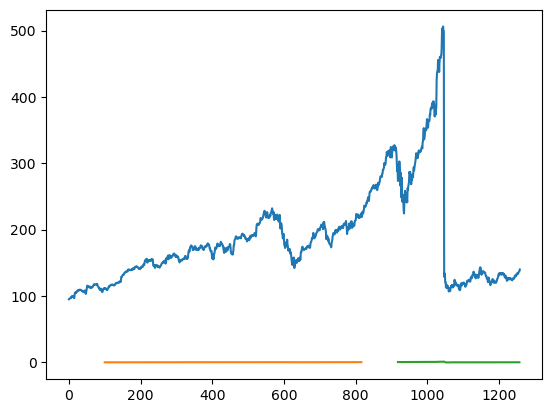

In [53]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

441

In [43]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
x_input

array([[0.09827293, 0.09764048, 0.09822428, 0.09292143, 0.08720506,
        0.08445634, 0.08484554, 0.07543177, 0.07509122, 0.07385064,
        0.06324495, 0.06390173, 0.07978594, 0.07329117, 0.06584773,
        0.061153  , 0.06429093, 0.05198249, 0.06347604, 0.06078813,
        0.06560448, 0.06334225, 0.07054245, 0.07438579, 0.07241547,
        0.062126  , 0.06081245, 0.06908295, 0.06701532, 0.0610557 ,
        0.06227195, 0.0637801 , 0.06421795, 0.06059353, 0.06606665,
        0.06813427, 0.07518852, 0.07594259, 0.08005351, 0.08603746,
        0.09244709, 0.08817806, 0.09593773, 0.09009973, 0.096108  ,
        0.09528095, 0.09693505, 0.09272683, 0.0936755 , 0.08988081,
        0.09567015, 0.09664315, 0.09584043, 0.0938701 , 0.09362685,
        0.08871321, 0.09134031, 0.07993189, 0.08054001, 0.08452931,
        0.08567259, 0.07749939, 0.07521284, 0.0675748 , 0.0729263 ,
        0.07895889, 0.07608854, 0.0726344 , 0.0722452 , 0.07861834,
        0.07404524, 0.07810752, 0.07762102, 0.07

In [45]:
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09764048 0.09822428 0.09292143 0.08720506 0.08445634 0.08484554
 0.07543177 0.07509122 0.07385064 0.06324495 0.06390173 0.07978594
 0.07329117 0.06584773 0.061153   0.06429093 0.05198249 0.06347604
 0.06078813 0.06560448 0.06334225 0.07054245 0.07438579 0.07241547
 0.062126   0.06081245 0.06908295 0.06701532 0.0610557  0.06227195
 0.0637801  0.06421795 0.06059353 0.06606665 0.06813427 0.07518852
 0.07594259 0.08005351 0.08603746 0.09244709 0.08817806 0.09593773
 0.09009973 0.096108   0.09528095 0.09693505 0.09272683 0.0936755
 0.08988081 0.09567015 0.09664315 0.09584043 0.0938701  0.09362685
 0.08871321 0.09134031 0.07993189 0.08054001 0.08452931 0.08567259
 0.07749939 0.07521284 0.0675748  0.0729263  0.07895889 0.07608854
 0.0726344  0.0722452  0.07861834 0.07404524 0.07810752 0.07762102
 0.07749939 0.07368037 0.0720506  0.07124787 0.07314522 0.06944782
 0.07516419 0.07518852 0.07723182 0.07818049 0.07569934 0.07871564
 0.08632936 0.08428606 0.08552664 0.08951593 0.0862

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1259

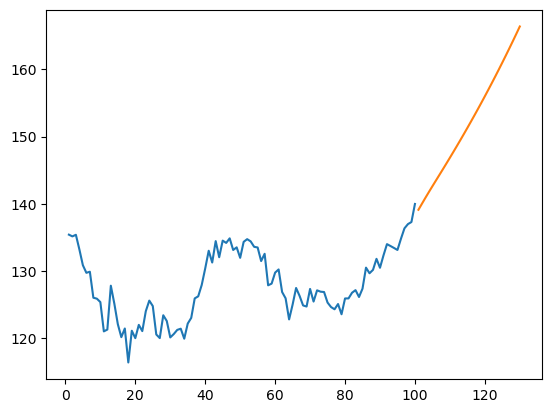

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

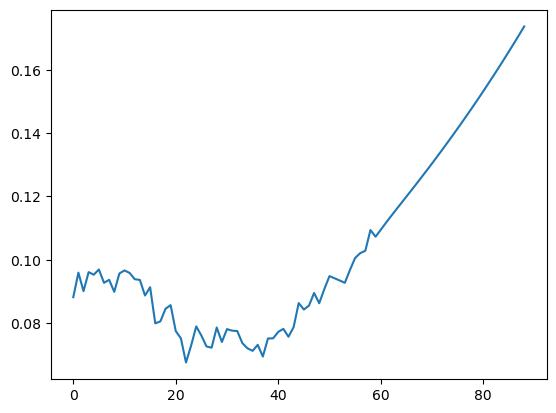

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

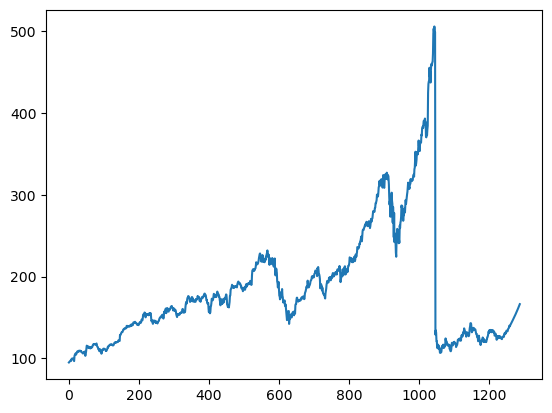

In [52]:
plt.plot(df3)